<a href="https://colab.research.google.com/github/Rafae1040/ead-energy/blob/main/Series_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlação entre consumo de energia elétrica e temperatura

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

1.1. Energia

In [2]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [3]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [4]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [5]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


**Qual é a granularidade da base de dados:** A granularidade diz respeito à escala utilizada como referência para o conjunto de dados, que cobre o período de janeiro de 2004 a dezembro de 2020. Todos os dados incluídos no conjunto estão dentro desse intervalo de tempo.

**Qual é o intervalo de tempo (min/max):** A resolução mínima do intervalo de tempo é mensal, enquanto que o seu limite máximo abrange desde o começo (janeiro de 2004) até o final (dezembro de 2020).

**1.2. Temperatura**

In [6]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [9]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [10]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [11]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


**Qual é a granularidade da base de dados:** A granularidade da base de dados é definida pelo período de referência de 15 de julho de 2018 a 31 de dezembro de 2020, abrangendo todos os dados do conjunto dentro desse intervalo de tempo.
**Qual é o intervalo de tempo (min/max):** O intervalo de tempo mínimo é diário, enquanto que o intervalo máximo abrange desde o dia 15 de julho de 2018 até o dia 31 de dezembro de 2020.

2. Processamento

Processe o dataframe energia:

a. Atributa ao index a coluna temporal.

In [12]:
energia = energia.set_index(keys=['referencia'])

In [13]:
energia.head()

,residencial,industrial,comercial
referencia,,,
2004-01-01,3694386,6977471,2450453
2004-02-01,3511541,7084623,2396965
2004-03-01,3629455,7087613,2402521
2004-04-01,3733863,7384540,2580914
2004-05-01,3537269,7258307,2344084


b. Selecione apenas os dados entre 2019 e 2020.

In [14]:
energia_2019_2020 = energia['2019':'2020']
print(energia_2019_2020.shape)

(24, 3)


In [15]:
energia['2019':'2020'].head()

,residencial,industrial,comercial
referencia,,,
2019-01-01,6389714,7545071,4370412
2019-02-01,6188834,7285407,4365504
2019-03-01,6072327,7556147,4303463
2019-04-01,5610278,7494816,4115920
2019-05-01,5785412,7597072,4141319


2.2. Temperatura

Processe o dataframe temperatura:
a. Atributa ao index a coluna temporal.

In [16]:
temperatura = temperatura.set_index(keys=['referencia'])

In [17]:
temperatura.head()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2018-07-15,18,21.0,19.0
2018-07-16,19,23.0,19.0
2018-07-17,17,21.0,19.0
2018-07-18,18,23.0,19.0
2018-07-19,19,23.0,19.0


b. Selecione apenas os dados entre 2019 e 2020.

In [18]:
temperatura_2019_2020 = temperatura['2019':'2020']
print(temperatura_2019_2020)

            temp-media-sp  temp-media-rj  temp-media-mg
referencia                                             
2019-01-01             22           28.0           21.0
2019-01-02             25           28.0           24.0
2019-01-03             26           31.0           24.0
2019-01-04             23           31.0           22.0
2019-01-05             21           28.0           23.0
...                   ...            ...            ...
2020-12-27             20           24.0           23.0
2020-12-28             21           25.0           23.0
2020-12-29             22           27.0           23.0
2020-12-30             24           27.0           23.0
2020-12-31             23           29.0           24.0

[731 rows x 3 columns]


In [19]:
temperatura_2019_2020.head()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2019-01-01,22,28.0,21.0
2019-01-02,25,28.0,24.0
2019-01-03,26,31.0,24.0
2019-01-04,23,31.0,22.0
2019-01-05,21,28.0,23.0


c. Remova todas as linhas que apresentem pelo menos um valores nulo.

In [20]:
temperatura_2019_2020.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2019-01-01 to 2020-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp-media-sp  731 non-null    int64  
 1   temp-media-rj  644 non-null    float64
 2   temp-media-mg  724 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 22.8 KB


In [21]:
temperatura_2019_2020 = temperatura_2019_2020.dropna(subset=['temp-media-rj', 'temp-media-mg'], axis=0)

In [22]:
temperatura_2019_2020.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 643 entries, 2019-01-01 to 2020-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp-media-sp  643 non-null    int64  
 1   temp-media-rj  643 non-null    float64
 2   temp-media-mg  643 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 20.1 KB


d. Combine as três colunas de temperatura em uma só chamada de temp-media e agregadas pela média (obtendo assim uma temperatura média aproximada da região sudeste).

In [23]:
temperatura_2019_2020['temp-media'] = temperatura_2019_2020[['temp-media-sp', 'temp-media-rj', 'temp-media-mg']].agg('mean', axis=1)


In [24]:
temperatura_2019_2020.head()

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2019-01-01,22,28.0,21.0,23.666667
2019-01-02,25,28.0,24.0,25.666667
2019-01-03,26,31.0,24.0,27.000000
2019-01-04,23,31.0,22.0,25.333333
2019-01-05,21,28.0,23.0,24.000000


f. Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a média como métrica de agregação.

In [25]:
resampled = temperatura_2019_2020.resample(rule='m').mean()

In [26]:
resampled.head()

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2019-01-31,24.000000,29.774194,24.483871,26.086022
2019-02-28,21.928571,27.464286,23.571429,24.321429
2019-03-31,21.258065,26.645161,23.032258,23.645161
2019-04-30,20.833333,26.066667,22.600000,23.166667
2019-05-31,19.161290,24.193548,21.225806,21.526882


In [27]:
resampled.shape

(24, 4)

3. Correlação

3.1. Consumo residencial

a. Gere um gráfico de linha para a série temporal de temperatura média agregada temp-media.

<ipython-input-28-c31e3c12eb52>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=resampled, x='referencia', y='temp-media', marker='1',palette='pastel')


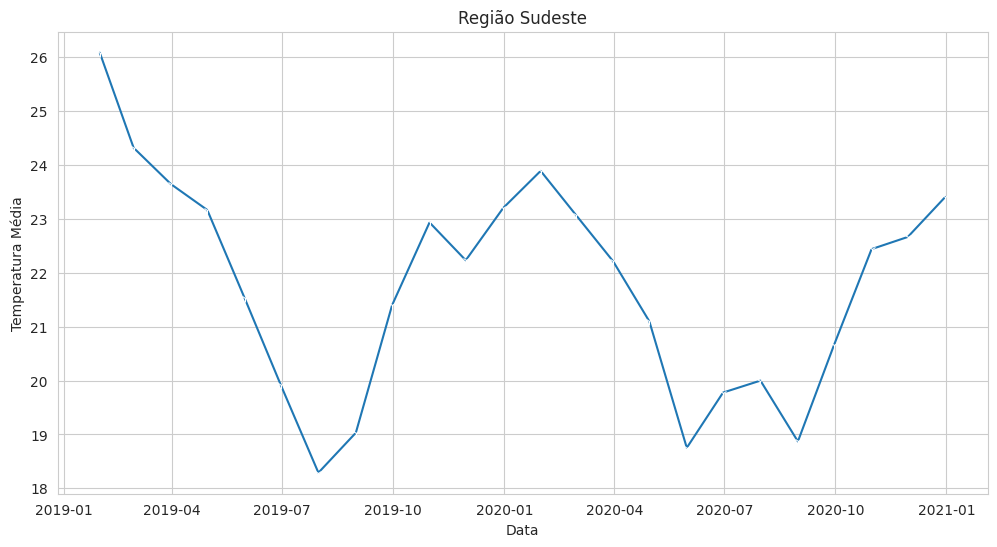

In [28]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=resampled, x='referencia', y='temp-media', marker='1',palette='pastel')
  grafico.set(title='Região Sudeste', ylabel='Temperatura Média', xlabel='Data')
  grafico.figure.set_size_inches(12, 6)

b. Gere um gráfico de linha para a série temporal do consumo de energia residencial.

<ipython-input-29-8636f8b92328>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=energia_2019_2020, x='referencia', y='residencial', marker='1', palette='pastel')


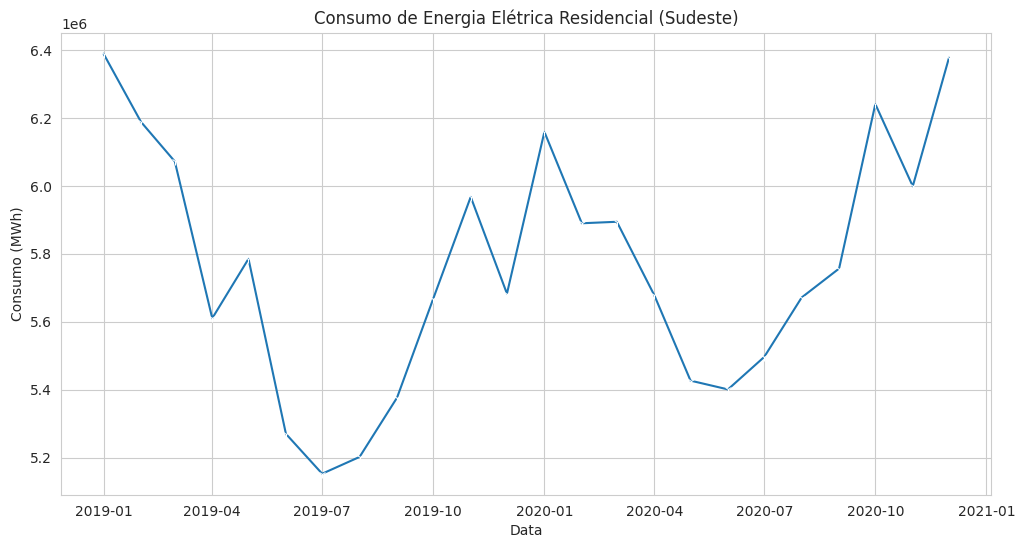

In [29]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia_2019_2020, x='referencia', y='residencial', marker='1', palette='pastel')
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data')
  grafico.figure.set_size_inches(12, 6)

c. Utilize o método corrcoef do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica residencial e a temperatura média agregada temp-media.

In [30]:
consumo_residencial = energia_2019_2020['residencial']
temperatura_media = resampled['temp-media']

pearson = np.corrcoef(consumo_residencial, temperatura_media)[0, 1]

print(pearson)

0.824271822739731


d. Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica residencial?

Sim, isso significa que, em geral, o consumo de energia elétrica residencial tende a aumentar quando a temperatura média também aumenta.

3.2. Consumo Comercial

<ipython-input-31-def7f0ee09f4>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=energia_2019_2020, x='referencia', y='comercial', marker='1', palette='pastel')


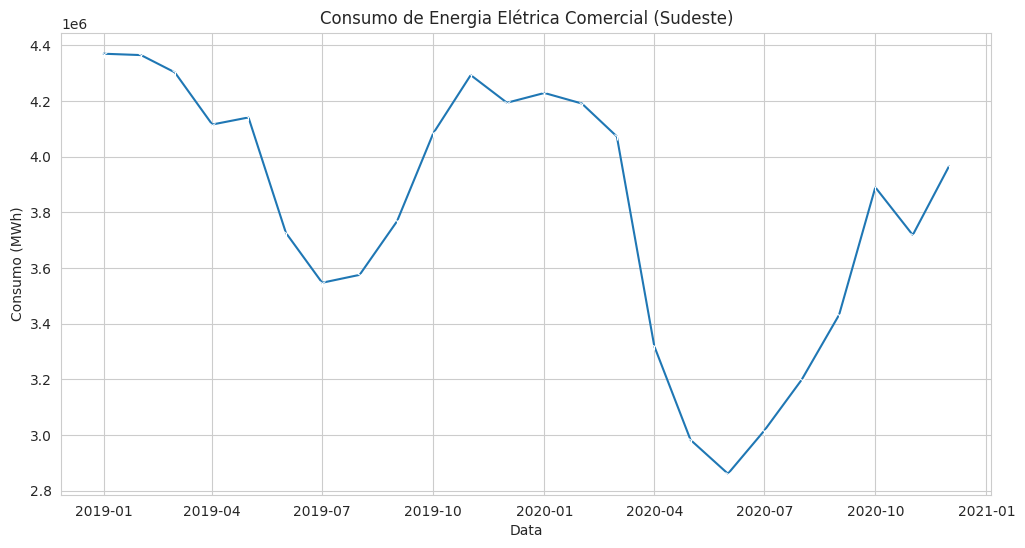

In [31]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia_2019_2020, x='referencia', y='comercial', marker='1', palette='pastel')
  grafico.set(title='Consumo de Energia Elétrica Comercial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data')
  grafico.figure.set_size_inches(12, 6)

In [32]:
consumo_comercial = energia_2019_2020['comercial']
temperatura_media = resampled['temp-media']

pearson = np.corrcoef(consumo_comercial, temperatura_media)[0, 1]

print(pearson)

0.8235028939103621


Podemos verificar que durante a metade de 2020 por causa da pandemia, por exemplo, muitos estabelecimentos comerciais tiveram que suspender suas atividades, o que resultou em uma queda significativa no consumo de energia elétrica.

3.3. Consumo industrial

<ipython-input-33-95b9e979d8ee>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=energia_2019_2020, x='referencia', y='industrial', marker='1', palette='pastel')


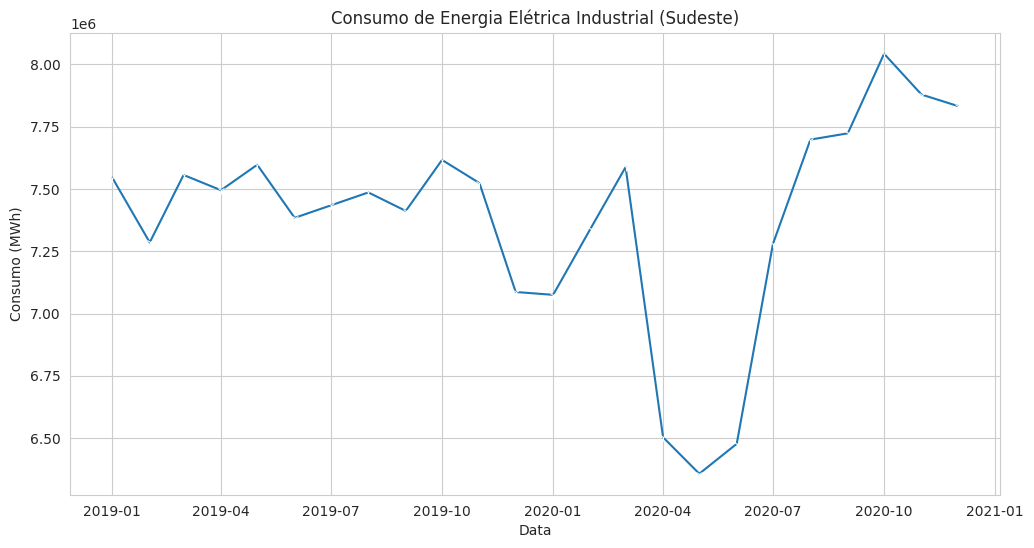

In [33]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia_2019_2020, x='referencia', y='industrial', marker='1', palette='pastel')
  grafico.set(title='Consumo de Energia Elétrica Industrial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data')
  grafico.figure.set_size_inches(12, 6)

O consumo industrial não segue um padrão correlacionado com a temperatura. Isso se deve ao fato de que as indústrias continuam funcionando independentemente da media da temperatura. No entanto, durante a metade de 2020, o consumo de energia elétrica industrial sofreu uma queda significativa, assim como ocorreu com o consumo comercial. E pelas medidas e restrições que foram adotadas por causa da pandemia as industrias voltaram a funcionar e consumir energia.